# 1. Importing Libraries

In [37]:
# Importing necessary libraries
import pandas as pd                                                             # library used for data manipulation and analysis
import numpy as np                                                              # library for numerical computations like arrays, matrices, and large data sets
import matplotlib.pyplot as plt                                                 # plotting library for creating static, animated, and data visualizations
import seaborn as sns                                                           # for data visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler                  # LabelEncoder: to convert categorical labels into numeric values. Standardscaler: to standardize the features by removing the mean and scaling to unit variance.
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix # metrics values for regression and classification models

# 2. Loading Dataset

In [38]:
# Loading dataset
dataset = pd.read_csv("/content/drive/MyDrive/Data Science/final_codeforces.csv")

# 3. Data Preprocessing

In [39]:
# rank-type column is created as a binary (0/1) column, with values assigned based on the rating column. Setting threshold value to decide 0 and 1 for rank-type
dataset['rank-type'] = dataset['rating'].apply(lambda x: 1 if x > 2220 else 0)
# print(df[['rating', 'rank-type']].head(10))  # Check for the first few rows
# print(df[['rating', 'rank-type']].tail(10))  # Check the last few rows

# this code cleans the dataset.
# drop_duplicates() removes duplicated rows
# dropna() removes any rows that have missing values (`NaN`) in any column.
dataset = dataset.drop_duplicates().dropna()

# sets up the data for the regression task (predicting the rating column).
# # drops these three columns ('rating'=target value(shouldn't use as features). the rest two are not used for prediction)
X_reg = dataset.drop(columns=['rating', 'userid', 'rank-type'], errors='ignore')   # X_reg = Feature dataset (independent variables)
y_reg = dataset['rating']  # y_reg = Target dataset

# 4. Data Splitting

In [40]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
# X_reg = Features Dataset (independent variables)
# y_reg = Target variable
# X_train_reg = Features of Training Dataset (Contest1 to Contest10) / X_test_reg = Features of Testing Dataset
# y_train_reg = Training Labels (Target label = ratings) / y_test_reg = Testing Labels (ratings)
# test_size=0.2 ==> 20% of the dataset is allocated for testing, while 80% is used for training
# random_state=42 ==> Ensures consistent results every time the code runs by fixing randomness

# 5. Data Scaling

In [41]:
 # Standardization
scaler = StandardScaler()                           # transforms the data so that each feature has a mean of 0 and a standard deviation of 1. helps models perform better,
X_train_reg = scaler.fit_transform(X_train_reg)     # the scaler calculates the mean and standard deviation
X_test_reg = scaler.transform(X_test_reg)           # ensures consistency: The test dataset is transformed using the same mean and standard deviation from the training set.

# 6. Best Regression Model Selection

In [42]:
# List of models to train
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Lasso Regression": Lasso(alpha=0.1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR()
}
# Train and evaluate each model
final_results = {}

for name, model in models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)

    # Store final results
    final_results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred)),
        'MAE': mean_absolute_error(y_test_reg, y_pred),
        'R² Score': r2_score(y_test_reg, y_pred)
    }

# Convert the results into a DataFrame for better readability
results_df = pd.DataFrame(final_results).T  # Transpose to switch rows and columns

# Print the results as a table
print("\nRegression Model Evaluation Results:")
print(results_df)

# # Determine the best model based on MSE, MAE, and R² score
# # Combine the metrics and calculate the "best score" for each model
scores = {}

for name, metrics in final_results.items():
    # Lower RMSE and MAE are better, so we use negative values to rank them
    score = (metrics['R² Score'] * 100) - (metrics['RMSE'] * 10) - (metrics['MAE'] * 10)
    scores[name] = score

# Find the model with the highest combined score
best_model = max(scores, key=scores.get)

print("\nBest Model based on MSE, MAE, and R² Score:")
print(f"{best_model}: {final_results[best_model]}")


Regression Model Evaluation Results:
                                   RMSE         MAE  R² Score
Linear Regression             73.685388   52.813437  0.925985
Random Forest Regressor       63.591047   37.167331  0.944875
Lasso Regression              73.637261   52.729593  0.926081
Gradient Boosting Regressor   64.761417   42.810455  0.942827
Support Vector Regression    211.141489  116.064704  0.392277

Best Model based on MSE, MAE, and R² Score:
Random Forest Regressor: {'RMSE': np.float64(63.59104730393387), 'MAE': 37.16733067729082, 'R² Score': 0.9448747567536468}


# 7. Fine-Tuning for Best Regressor

In [43]:
# Based on previous training results, Random Forest Regressor is the best model.
# Define hyperparameter values to test
estimators = [100, 200, 300]

# Store tuning results
tuning_results = []

# Iterate through different `n_estimators`
for n in estimators:

    # Train Random Forest
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train_reg, y_train_reg)
    y_pred_rf = rf_model.predict(X_test_reg)

    # Evaluate performance
    rf_results = {
        'Model': 'Random Forest',
        'n_estimators': n,
        'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_rf)),
        'MAE': mean_absolute_error(y_test_reg, y_pred_rf),
        'R² Score': r2_score(y_test_reg, y_pred_rf)
    }

    # Store results for comparison
    tuning_results.append(rf_results)

# Convert results to DataFrame for better analysis
results_df = pd.DataFrame(tuning_results)

# Sort by R² Score in descending order (best models first)
best_models = results_df.sort_values(by='R² Score', ascending=False).reset_index(drop=True)

# Print the tuning results table
print("\n========== Random Forest Hyperparameter Tuning Results ==========")
print(results_df)

# Print the best and second-best models based on R² score
print("\n========== Best Parameter of Random Forest Regressor ==========")
print(best_models.iloc[0])



========== Random Forest Hyperparameter Tuning Results ==========
           Model  n_estimators       RMSE        MAE  R² Score
0  Random Forest           100  63.591047  37.167331  0.944875
1  Random Forest           200  64.278986  37.625339  0.943676
2  Random Forest           300  64.735740  37.735830  0.942872

========== Best Parameter of Random Forest Regressor ==========
Model           Random Forest
n_estimators              100
RMSE                63.591047
MAE                 37.167331
R² Score             0.944875
Name: 0, dtype: object


# 8. Best Classification Model Selection

In [44]:
# Load dataset again to get back initial stage
# df = pd.read_csv("/content/drive/MyDrive/Data Science/final_codeforces.csv")

# # Convert 'rank-type' based on rating threshold
# df['rank-type'] = df['rating'].apply(lambda x: 1 if x > 2220 else 0)
# # print(df[['rating', 'rank-type']].head(10))  # Check for the first few rows
# # print(df[['rating', 'rank-type']].tail(10))  # Check the last few rows

# # Remove duplicate rows
# df = df.drop_duplicates().dropna()

# Fill missing numerical values with mean (if NaN exists)
num_cols = ['contest1', 'contest2', 'contest3', 'contest4', 'contest5',
            'contest6', 'contest7', 'contest8', 'contest9', 'contest10']

dataset[num_cols] = dataset[num_cols].apply(lambda col: col.fillna(col.mean()) if col.isnull().any() else col)

# Define features (X) and target (y)
X = dataset.drop(columns=['rating', 'userid'], errors='ignore')  # X_reg = Features Dataset (independent variables)
X = dataset[num_cols]
y_rank_type = dataset['rank-type']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_rank_type, test_size=0.2, random_state=42)

# Define Classification Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Store results
results = []

# Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1])

    # print(f"\n{name} Results:")
    # print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    # print("Confusion Matrix:")
    # print(cm)

# Convert results into DataFrame for better readability
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Sort models by F1-Score in descending order
results_df = results_df.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

# Print results table
print("\n========== Model Evaluation Results ==========")
print(results_df)

# Print Best Model and Second Best Model
print("\n========== Best Model ==========")
print(results_df.iloc[0])


========== Model Evaluation Results ==========
                 Model  Accuracy  Precision    Recall  F1-Score
0    Gradient Boosting  0.928287   0.928418  0.928287  0.928294
1        Random Forest  0.924303   0.924318  0.924303  0.924296
2                  SVM  0.896414   0.896548  0.896414  0.896424
3                  KNN  0.896414   0.901621  0.896414  0.896207
4  Logistic Regression  0.864542   0.864827  0.864542  0.864464

========== Best Model ==========
Model        Gradient Boosting
Accuracy              0.928287
Precision             0.928418
Recall                0.928287
F1-Score              0.928294
Name: 0, dtype: object


# 9. Fine-Tuning for Best Classifier

In [45]:
# Based on previous training, the best classifier is Gradient Boosting.
# Load dataset again to get back initial stage
# df = pd.read_csv("/content/drive/MyDrive/Data Science/final_codeforces.csv")

# # Convert 'rank-type' based on rating threshold
# dataset['rank-type'] = dataset['rating'].apply(lambda x: 1 if x > 2220 else 0)

# # Data Preprocessing
# dataset = dataset.drop_duplicates().dropna()

# Define Features & Target for Classification
X_clf = dataset.drop(columns=['rank-type', 'userid', 'rating'], errors='ignore')  # Features
y_clf = dataset['rank-type']  # Target

# Split data into training and test sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Standardization of feature data
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

# Define hyperparameter values to test for Gradient Boosting Classifier
estimators = [100, 200, 300]
results = []

# Iterate through different `n_estimators` and evaluate each model
for n in estimators:
    # print(f"\nTraining Gradient Boosting Classifier with n_estimators = {n}...\n")

    # Train the model with the current number of estimators
    gbc = GradientBoostingClassifier(n_estimators=n, random_state=42)
    gbc.fit(X_train_clf, y_train_clf)
    y_pred = gbc.predict(X_test_clf)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test_clf, y_pred)
    precision = precision_score(y_test_clf, y_pred, average='weighted')
    recall = recall_score(y_test_clf, y_pred, average='weighted')
    f1 = f1_score(y_test_clf, y_pred, average='weighted')

    # Append the metrics to results
    results.append([n, accuracy, precision, recall, f1])

# Convert results into DataFrame for better readability
results_df = pd.DataFrame(results, columns=['n_estimators', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Print results table
print("\n========== Model Evaluation Results ==========")
print(results_df)

# Find best model based on F1-Score
best_model_row = results_df.loc[results_df['F1-Score'].idxmax()]

# Final Model Evaluation using the best model
best_model = GradientBoostingClassifier(n_estimators=int(best_model_row['n_estimators']), random_state=42)
best_model.fit(X_train_clf, y_train_clf)
y_pred_best = best_model.predict(X_test_clf)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_best))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_clf, y_pred_best)
print("\nConfusion Matrix:\n", conf_matrix)

# Print best model details
print(f"\nBest Parameter: n_estimators={best_model_row['n_estimators']}")
print(f"Best Metrics: Accuracy={best_model_row['Accuracy']:.4f}, Precision={best_model_row['Precision']:.4f}, Recall={best_model_row['Recall']:.4f}, F1-Score={best_model_row['F1-Score']:.4f}")



========== Model Evaluation Results ==========
   n_estimators  Accuracy  Precision    Recall  F1-Score
0           100  0.928287   0.928418  0.928287  0.928294
1           200  0.932271   0.932309  0.932271  0.932275
2           300  0.936255   0.936255  0.936255  0.936255

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       123
           1       0.94      0.94      0.94       128

    accuracy                           0.94       251
   macro avg       0.94      0.94      0.94       251
weighted avg       0.94      0.94      0.94       251


Confusion Matrix:
 [[115   8]
 [  8 120]]

Best Parameter: n_estimators=300.0
Best Metrics: Accuracy=0.9363, Precision=0.9363, Recall=0.9363, F1-Score=0.9363


# 10. Final Prediction for Regression

In [46]:
# Best Regressor Model = Random Forest Regressor
# Best hypaparameter = 100

best_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
best_regressor.fit(X_train_reg, y_train_reg)    # trains the model using training and target values
y_pred_reg = best_regressor.predict(X_test_reg) # predicts the rating values for the test dataset

# model predicts accuracy by combining multiple decision trees
# n_estimators=100 (100 decision trees)

# Evaluate Regression Model
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)) # calculates the average squared differences between actual and predicted values.
mae = mean_absolute_error(y_test_reg, y_pred_reg) # calculates the absolute differences between actual and predicted values
r2 = r2_score(y_test_reg, y_pred_reg) # measures the variance in the target variable

# 11. Data Visualization for Regression


===== Regression Model:  Random Forest regressor =====
RMSE: 63.59
MAE: 37.17
R² Score: 0.9449



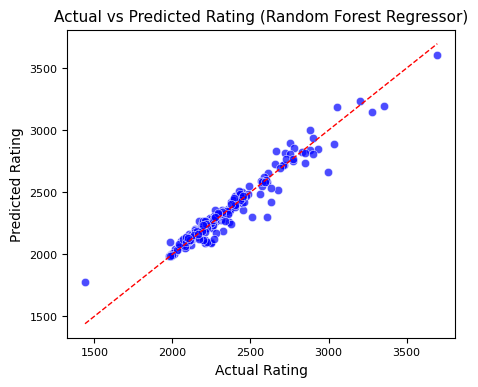

In [47]:
print("\n===== Regression Model:  Random Forest regressor =====")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}\n")

# Regression Plot
plt.figure(figsize=(5, 4))  # Reduced size
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.7, color="blue")
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color="red", linestyle="--", linewidth=1)  # Adjusted line thickness
plt.xlabel("Actual Rating", fontsize=10)  # Smaller font
plt.ylabel("Predicted Rating", fontsize=10)  # Smaller font
plt.title("Actual vs Predicted Rating (Random Forest Regressor)", fontsize=11)  # Smaller title
plt.xticks(fontsize=8)  # Reduce x-axis ticks
plt.yticks(fontsize=8)  # Reduce y-axis ticks
plt.show()


# 12. Data Preparation for Classification Model

In [48]:
X_clf = dataset.drop(columns=['rank-type', 'userid', 'rating'], errors='ignore')  # drops three columns
y_clf = dataset['rank-type'] # target column

# Data Splitting
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Data Standardization
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

# 13. Final Prediction for Classification

In [49]:
# Best Classification Model = Gradient Boosting Classifier
# Best hypaparameter = 300

# Train Gradient Boosting Classifier
best_classifier = GradientBoostingClassifier(n_estimators=300, random_state=42) # 300 boosting stages (trees)
best_classifier.fit(X_train_clf, y_train_clf) # trains the Gradient Boosting Classifier
y_pred_clf = best_classifier.predict(X_test_clf) # makes predictions on the test data

# Evaluate Classification Model
accuracy = accuracy_score(y_test_clf, y_pred_clf)
class_report = classification_report(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

# 14. Data Visualization for Classification


===== Classification Model: Gradient Boosting Classifier =====
Accuracy: 0.9363

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       123
           1       0.94      0.94      0.94       128

    accuracy                           0.94       251
   macro avg       0.94      0.94      0.94       251
weighted avg       0.94      0.94      0.94       251



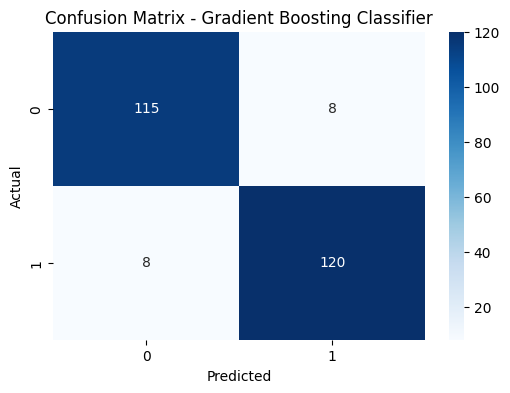

In [50]:
print("\n===== Classification Model: Gradient Boosting Classifier =====")
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", class_report)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))  # Smaller size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()
